# 次元削減

> 無関係な特徴量や冗長な特徴量を削除すること

特徴量は多ければ多いほどよいのではなく、次元を可能な限り減らしたほうがよい。

**理由**

* 冗長な特徴量は"イライラさせる"ものであり、学習器を混乱させる可能性がある。（一部には当てはまらないが）ほとんどの手法では、より少ない次元数を用いたほうがよい。  
※ "イライラさせる"ものは本の表現。意味は、計算の複雑性が増してしまうものと理解。
* 特徴量が多くなればなるほど、調整すべきパラメータの数が増え、過学習のリスクが高まる。
* 人為的な要因で高次元であるだけで、本来はより小さい次元かもしれない。
* 次元数が小さいと、より高速に訓練を行うことができ、より多くのことを試すことができる。結果として、最終的な性能は良くなりやすい。
* もしデータを視覚化するのであれば、対象データは２次元もしくは３次元に限定される。

| 次元削減の構成 | - | - | - |
| --- | --- | ---- | ---- |
| 次元削減 | 特徴選択 | 今までの方法※1 | |
| | | フィルター法 | 相関 |
| | |  | 相互情報量 |
| | | ラッパー法 | |
| | 特徴抽出 | 主成分分析 | |
| | | 多次元尺度構成法 | | |

※1. 今までは特徴量について考案し、分析を行い、「使わない」と判断してきた。  
※. 上記は本書内での紹介のみ。上記以外にも次元削減の方法はある。 Ref. https://en.wikipedia.org/wiki/Dimensionality_reduction

## 特徴選択

名前の通り。
> 特徴量のうち意味のある部分だけを選択することで、不要で冗長な特徴量をデータから除去する方法  
> Ref. https://ja.wikipedia.org/wiki/%E7%89%B9%E5%BE%B4%E9%81%B8%E6%8A%9E

### フィルター法

> 統計のテクニックを用いて各特徴の「予測に使える度合」を点数化し、点数をもとに特徴にランク付けを行い、予測に使うか否かをそれぞれ決定する方法  
> Ref. https://www.codexa.net/feature-selection-methods/#Filter_Method

**フィルター法の欠点**

* 特徴量を独立した状態で、有効でない特徴量を判断し、除去してしまう。


#### 相関

相関を用いることで、２つの特徴量間の線形な関係性を見ることができる。  
相関係数は、ピアソンの相関係数（Pearson correlation cofficient）により計算できる。  

**ピアソンの相関係数**  
`scipy.stat`の`pearsonr()`関数を用いることで計算できる。相関係数とP値を返す。    
P値が示す内容は、対象となるデータが無関係なシステムから生成された確率を表す。（P値が大きいほど、相関係数を信頼できる度合いが減る）

※ 相関係数とP値に関する詳細な説明は以下を参照のこと。
* 定義：https://ja.wikipedia.org/wiki/%E6%9C%89%E6%84%8F
* 式：https://support.minitab.com/ja-jp/minitab/18/help-and-how-to/statistics/basic-statistics/how-to/correlation/methods-and-formulas/methods-and-formulas/#p-value


<Figure size 432x288 with 0 Axes>

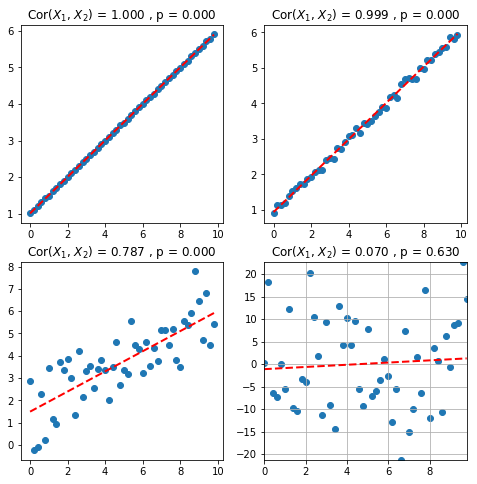

<Figure size 432x288 with 0 Axes>

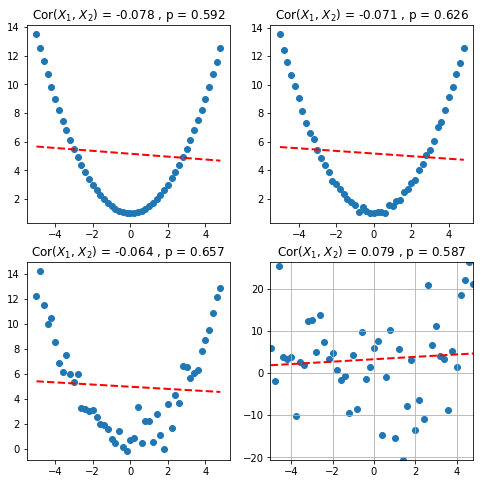

In [6]:
from matplotlib import pylab
import numpy as np
import scipy
from scipy.stats import norm, pearsonr


def _plot_correlation_func(x, y):

    r, p = pearsonr(x, y)
    title = 'Cor($X_1$, $X_2$) = {:.3f} , p = {:.3f}'.format(r,p)
    pylab.scatter(x, y)
    pylab.title(title)
#     pylab.xlabel("$X_1$")
#     pylab.ylabel("$X_2$")

    f1 = scipy.poly1d(scipy.polyfit(x, y, 1))
    pylab.plot(x, f1(x), "r--", linewidth=2)
    # pylab.xticks([w*7*24 for w in [0,1,2,3,4]], ['week %i'%(w+1) for w in
    # [0,1,2,3,4]])


def plot_correlation_demo():
    np.random.seed(0)  # to reproduce the data later on
    pylab.clf()
    pylab.figure(num=None, figsize=(8, 8))

    x = np.arange(0, 10, 0.2)

    pylab.subplot(221)
    y = 0.5 * x + norm.rvs(1, scale=.01, size=len(x))
    _plot_correlation_func(x, y)

    pylab.subplot(222)
    y = 0.5 * x + norm.rvs(1, scale=.1, size=len(x))
    _plot_correlation_func(x, y)

    pylab.subplot(223)
    y = 0.5 * x + norm.rvs(1, scale=1, size=len(x))
    _plot_correlation_func(x, y)

    pylab.subplot(224)
    y = norm.rvs(1, scale=10, size=len(x))
    _plot_correlation_func(x, y)

    pylab.autoscale(tight=True)
    pylab.grid(True)

    pylab.show()

    pylab.clf()
    pylab.figure(num=None, figsize=(8, 8))

    x = np.arange(-5, 5, 0.2)

    pylab.subplot(221)
    y = 0.5 * x ** 2 + norm.rvs(1, scale=.01, size=len(x))
    _plot_correlation_func(x, y)

    pylab.subplot(222)
    y = 0.5 * x ** 2 + norm.rvs(1, scale=.1, size=len(x))
    _plot_correlation_func(x, y)

    pylab.subplot(223)
    y = 0.5 * x ** 2 + norm.rvs(1, scale=1, size=len(x))
    _plot_correlation_func(x, y)

    pylab.subplot(224)
    y = 0.5 * x ** 2 + norm.rvs(1, scale=10, size=len(x))
    _plot_correlation_func(x, y)

    pylab.autoscale(tight=True)
    pylab.grid(True)

    pylab.show()

if __name__ == '__main__':
    plot_correlation_demo()

**相関の特徴**
* 線形な関係性を検出するのに有効。
* それ以外（ex. 2次関数）ではうまくいかない。

**実際のやり方**

1. 特徴量の相関を計算する。
2. 相関が高いものは特徴量は１つにまとめることができる。

### 相互情報量

#### 情報エントロピー

相互情報量を理解するために、ここでは、情報エントロピーについて先に説明する。

> あるできごと（事象）が起きた際、それがどれほど起こりにくいかを表す尺度である。ありふれたできごと（たとえば「風の音」）が起こったことを知ってもそれはたいした「情報」にはならないが、逆に珍しいできごと（たとえば「曲の演奏」）が起これば、それはより多くの「情報」を含んでいると考えられる。情報量はそのできごとが本質的にどの程度の情報を持つかの尺度であるとみなすこともできる。  
> https://ja.wikipedia.org/wiki/%E6%83%85%E5%A0%B1%E9%87%8F

**定義**

```
時間的に連続して起こる離散的な確率事象 X の生起確率 Pr[X=i] によって定まる情報量 ( -log Pr[X=i]) の期待値が、エントロピー H(X) 
```
![entropy](../images/entropy.png)


##### 相互情報量

> ２つの特徴量があり、一方の特徴量について知っている状態で、もう一方の特徴量を知ることでどれだけの情報が付与されるかを表す

**定義**

![mutualInformation](../images/mutualInformation.png)

F.Y.I. https://mathtrain.jp/mutualinfo


<Figure size 432x288 with 0 Axes>

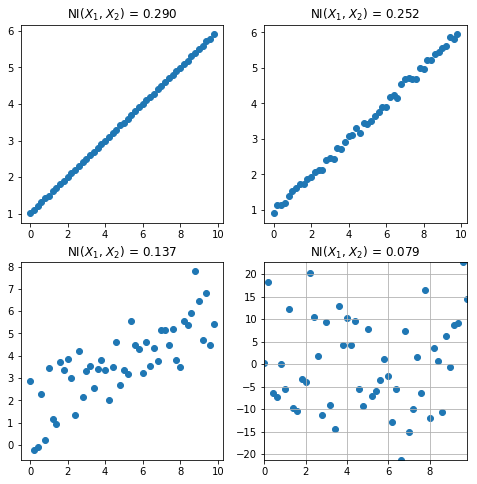

<Figure size 432x288 with 0 Axes>

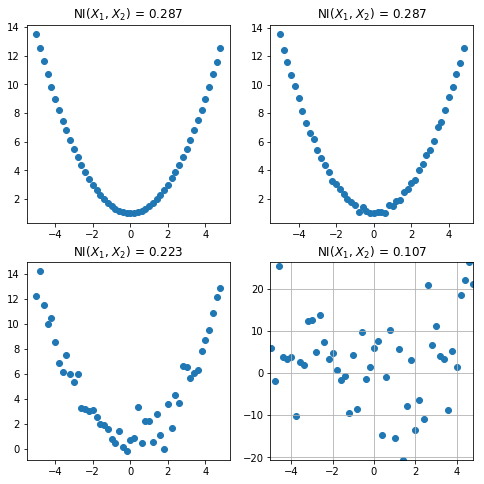

In [12]:
from matplotlib import pylab
import numpy as np
from scipy.stats import norm, entropy

def mutual_info(x, y, bins=10):
    counts_xy, bins_x, bins_y = np.histogram2d(x, y, bins=(bins, bins))
    counts_x, bins = np.histogram(x, bins=bins)
    counts_y, bins = np.histogram(y, bins=bins)

    counts_xy += 1
    counts_x += 1
    counts_y += 1
    P_xy = counts_xy / np.sum(counts_xy, dtype=float)
    P_x = counts_x / np.sum(counts_x, dtype=float)
    P_y = counts_y / np.sum(counts_y, dtype=float)

    I_xy = np.sum(P_xy * np.log2(P_xy / (P_x.reshape(-1, 1) * P_y)))

    return I_xy / (entropy(counts_x) + entropy(counts_y))

def _plot_mi_func(x, y):

    mi = mutual_info(x, y)
    title = "NI($X_1$, $X_2$) = %.3f" % mi
    pylab.scatter(x, y)
    pylab.title(title)


def plot_mi_demo():
    np.random.seed(0)  # to reproduce the data later on
    pylab.clf()
    pylab.figure(num=None, figsize=(8, 8))

    x = np.arange(0, 10, 0.2)

    pylab.subplot(221)
    y = 0.5 * x + norm.rvs(1, scale=.01, size=len(x))
    _plot_mi_func(x, y)

    pylab.subplot(222)
    y = 0.5 * x + norm.rvs(1, scale=.1, size=len(x))
    _plot_mi_func(x, y)

    pylab.subplot(223)
    y = 0.5 * x + norm.rvs(1, scale=1, size=len(x))
    _plot_mi_func(x, y)

    pylab.subplot(224)
    y = norm.rvs(1, scale=10, size=len(x))
    _plot_mi_func(x, y)

    pylab.autoscale(tight=True)
    pylab.grid(True)

    pylab.show()

    pylab.clf()
    pylab.figure(num=None, figsize=(8, 8))

    x = np.arange(-5, 5, 0.2)

    pylab.subplot(221)
    y = 0.5 * x ** 2 + norm.rvs(1, scale=.01, size=len(x))
    _plot_mi_func(x, y)

    pylab.subplot(222)
    y = 0.5 * x ** 2 + norm.rvs(1, scale=.1, size=len(x))
    _plot_mi_func(x, y)

    pylab.subplot(223)
    y = 0.5 * x ** 2 + norm.rvs(1, scale=1, size=len(x))
    _plot_mi_func(x, y)

    pylab.subplot(224)
    y = 0.5 * x ** 2 + norm.rvs(1, scale=10, size=len(x))
    _plot_mi_func(x, y)

    pylab.autoscale(tight=True)
    pylab.grid(True)

    pylab.show()

if __name__ == '__main__':
    plot_mi_demo()

**やりかた**

1. 全ての組み合わせのペアの特徴量を対象として、相互情報量を計算する。
2. 大きい相互情報量のペアについては、どちらかを直接、またはもしくは、回帰を行って削除する。（「大きい値」の基準は決めなければならない）

**相互情報量の特徴**

* 特徴量が増えると、処理コストが非常に高くなる。（特徴量の数の２乗に比例）

### ラッパー法

> モデル自体にどの特徴量が有効であるか判断させる方法

つまり、特徴量をいくつか選択し、モデルの有効性からその特徴量の重要度を計算するものという理解。  
（全特徴量のセットに対して、愚直に計算すると計算量が膨大になるため）ラッパー法用の計算方法はいくつかある（sklearn.feature_selectionパッケージ内にあるらしい）が、本書では、RFE（Recursive feature elimination)を用いていた。

F.Y.I. https://qiita.com/nazoking@github/items/b9eb61f0c981af2cbdd0#1133-%E5%86%8D%E5%B8%B0%E7%9A%84%E3%81%AA%E7%89%B9%E5%BE%B4%E3%81%AE%E9%99%A4%E5%8E%BB

単純に言えば、一番重要度の低い特徴量を削除して計算することを繰り返す、と理解。

**ラッパー法特徴**

* フィルター法とは違い、特徴量を独立して計算することはない。
* 計算量的にコストが高い。
* モデルの過剰適合を起こす危険性がある

## 特徴抽出

* 冗長な特徴量を取り除き、無用な特徴量を削除したあとでも、依然として特徴量が多すぎるということがよくある。  
* データを可視化したいとき、意味のあるグラフを作成するためには最終的に多くても３次元のデータにする必要がある。

→ このようなときに、特徴抽出手法を用いる。

> 特徴抽出手法は、モデルにとってさらに都合の良いように特徴空間を再構成する。

ここでは、線形な手法の主成分分析と非線形な手法の多次元尺度構成法を紹介する。


### 主成分分析(PCA)

本書はわかりにくいので、以下を参照。

* 考え方： https://logics-of-blue.com/principal-components-analysis/
* 計算： http://blog.aidemy.net/entry/2017/10/19/222941


[0.96393127]


<Figure size 432x288 with 0 Axes>

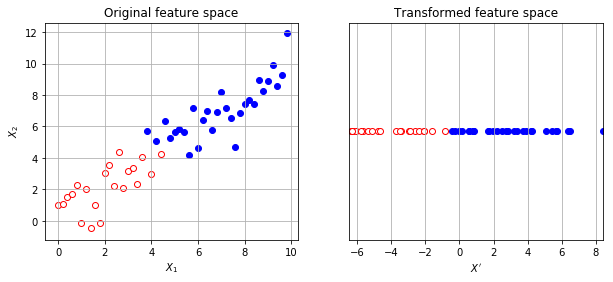

In [7]:
from matplotlib import pylab
import numpy as np

from sklearn import decomposition

np.random.seed(3)

x1 = np.arange(0, 10, .2)
x2 = x1 + np.random.normal(scale=1, size=len(x1))


pylab.clf()
fig = pylab.figure(num=None, figsize=(10, 4))
pylab.subplot(121)

title = "Original feature space"
pylab.title(title)
pylab.xlabel("$X_1$")
pylab.ylabel("$X_2$")

x1 = np.arange(0, 10, .2)
x2 = x1 + np.random.normal(scale=1, size=len(x1))

good = (x1 > 5) | (x2 > 5)
bad = ~good

x1g = x1[good]
x2g = x2[good]
pylab.scatter(x1g, x2g, edgecolor="blue", facecolor="blue")

x1b = x1[bad]
x2b = x2[bad]
pylab.scatter(x1b, x2b, edgecolor="red", facecolor="white")

pylab.grid(True)

pylab.subplot(122)

X = np.c_[(x1, x2)]

pca = decomposition.PCA(n_components=1)
Xtrans = pca.fit_transform(X)

Xg = Xtrans[good]
Xb = Xtrans[bad]

pylab.scatter(
    Xg[:, 0], np.zeros(len(Xg)), edgecolor="blue", facecolor="blue")
pylab.scatter(
    Xb[:, 0], np.zeros(len(Xb)), edgecolor="red", facecolor="white")
title = "Transformed feature space"
pylab.title(title)
pylab.xlabel("$X'$")
fig.axes[1].get_yaxis().set_visible(False)

print(pca.explained_variance_ratio_)

pylab.grid(True)

pylab.autoscale(tight=True)
pylab.show()


**PCAの特徴**

* 変換後の分散が最大になる
* 最終的な再構成誤差（変換空間から元となる空間へ戻したときの特徴量とオリジナルな特徴量の誤差）が最小化される
* 線形手法であり、非線形には向かない（非線形にはカーネルPCAと呼ばれる手法もある）
* 特殊なデータには向かない。（ex.図11-9）


### 多次元尺度構成法（MDS）

データ間の相違性に着目し、相違性をデータ間の距離を元に、低次元（普通は２次元、または３次元）空間に配置する。
その際に、低次元空間での新しい距離が元の特徴空間上での距離とできるだけ似るようにする。

実際にアイリスのデータでやっている。アイリスデータセットは１つの花あたり４つの属性を持っているので、４次元。

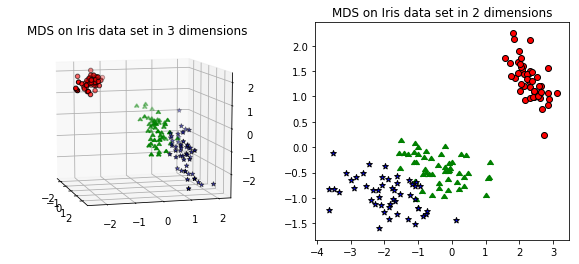

In [10]:
import numpy as np
from matplotlib import pylab
from mpl_toolkits.mplot3d import Axes3D

from sklearn import linear_model, manifold, decomposition, datasets
logistic = linear_model.LogisticRegression()

np.random.seed(3)

# all examples will have three classes in this file
colors = ['r', 'g', 'b']
markers = ['o', 6, '*']


def plot_iris_mds():

    iris = datasets.load_iris()
    X = iris.data
    y = iris.target

    # MDS

    fig = pylab.figure(figsize=(10, 4))

    ax = fig.add_subplot(121, projection='3d')
    ax.set_facecolor('white')

    mds = manifold.MDS(n_components=3)
    Xtrans = mds.fit_transform(X)

    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], Xtrans[y == cl][:, 2], c=color, marker=marker, edgecolor='black')
    pylab.title("MDS on Iris data set in 3 dimensions")
    ax.view_init(10, -15)

    mds = manifold.MDS(n_components=2)
    Xtrans = mds.fit_transform(X)

    ax = fig.add_subplot(122)
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], c=color, marker=marker, edgecolor='black')
    pylab.title("MDS on Iris data set in 2 dimensions")

    pylab.show()

if __name__ == '__main__':
    plot_iris_mds()

**MDS注意点**

* 各特徴の単位を理解する必要がある。ユークリッド距離を使って比較できない特徴では適さない。（ex. エンコードされたデータ 0=赤い丸、1=青い星、2=緑の三角など）